In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

# To ignore all warnings
warnings.filterwarnings('ignore')

# To ignore specific warnings
warnings.filterwarnings('ignore', category=UserWarning)


In [2]:
# This line of code reads a CSV file named "laptop_data.csv" using pandas 
# and loads its contents into a pandas dataframe called "df". 
df = pd.read_csv("laptop.csv") 

In [3]:
# Now let's see the first 5 rows of the 'df' dataframe
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
# Let's understand out data better by seeing the summary of various columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
# Let's check if there are any duplicate rows in the dataframe
df.duplicated().sum()

0

In [6]:
# Let's check for any missing or null values in ur dataframe
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [7]:
# Drop rows with missing values
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Unnamed: 0.1        0
Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [9]:
# Drop the unwanted columns 'Unnamed: 0.1' and 'Unnamed: 0'
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

In [10]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [11]:
# Let's remove the 'GB' part in Ram and 'kg' part in Weight as it will interfere with our training of model
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Weight'] = df['Weight'].str.replace('kg','')

In [12]:
# Let's rename the 'Ram' column to 'RAM'
df = df.rename(columns={'Ram': 'RAM'})
# Let's rename the 'ScreenResolution' column to 'Screen Resolution'
df = df.rename(columns={'ScreenResolution': 'Screen Resolution'})
# Let's rename the 'TypeName' column to 'Type Name'
df = df.rename(columns={'TypeName': 'Type Name'})

In [13]:
df.head()

,Company,Type Name,Inches,Screen Resolution,Cpu,RAM,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [14]:
unique_values = df['Inches'].unique()

print(unique_values)

['13.3' '15.6' '15.4' '14' '12' '17.3' '13.5' '12.5' '13' '18.4' '13.9'
 '11.6' '25.6' '35.6' '12.3' '27.3' '24' '33.5' '?' '31.6' '17' '15'
 '14.1' '11.3' '10.1']


In [15]:
df[df["Inches"] == "?"]

,Company,Type Name,Inches,Screen Resolution,Cpu,RAM,Memory,Gpu,OpSys,Weight,Price
476,Dell,Workstation,?,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78,128298.24


In [16]:
value = "?"
(df== value).any()


Company              False
Type Name            False
Inches                True
Screen Resolution    False
Cpu                  False
RAM                  False
Memory                True
Gpu                  False
OpSys                False
Weight                True
Price                False
dtype: bool

In [17]:
import numpy as np
import pandas as pd

# Define a function to clean and convert columns
def clean_and_convert(column):
    # Replace '?' with NaN and convert to numeric
    column = pd.to_numeric(column.replace('?', np.nan), errors='coerce')
    return column

# Apply the function to 'Inches' and 'Weight' 
df['Inches'] = clean_and_convert(df['Inches'])
df['Weight'] = clean_and_convert(df['Weight'])

# Fill missing values with the median
df['Inches'].fillna(df['Inches'].median(), inplace=True)
df['Weight'].fillna(df['Weight'].median(), inplace=True)

# Convert columns to appropriate data types
df['Inches'] = df['Inches'].astype(float)
df['Weight'] = df['Weight'].astype(float)




In [18]:
df

,Company,Type Name,Inches,Screen Resolution,Cpu,RAM,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1273 non-null   object 
 1   Type Name          1273 non-null   object 
 2   Inches             1273 non-null   float64
 3   Screen Resolution  1273 non-null   object 
 4   Cpu                1273 non-null   object 
 5   RAM                1273 non-null   object 
 6   Memory             1273 non-null   object 
 7   Gpu                1273 non-null   object 
 8   OpSys              1273 non-null   object 
 9   Weight             1273 non-null   float64
 10  Price              1273 non-null   float64
dtypes: float64(3), object(8)
memory usage: 119.3+ KB


<Axes: xlabel='Price', ylabel='Count'>

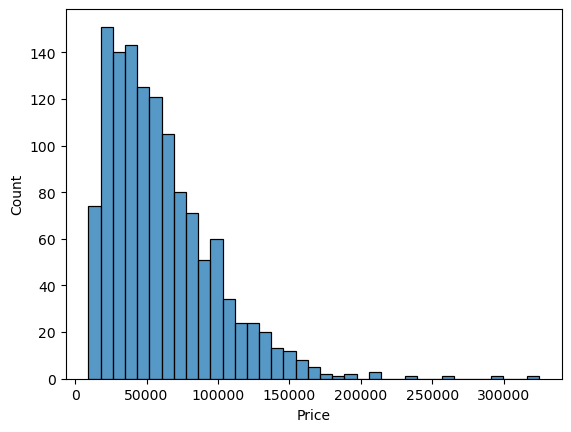

In [20]:
# Let's create a histogram of the distribution of the price variable
sns.histplot(df['Price'])

<Axes: xlabel='Company'>

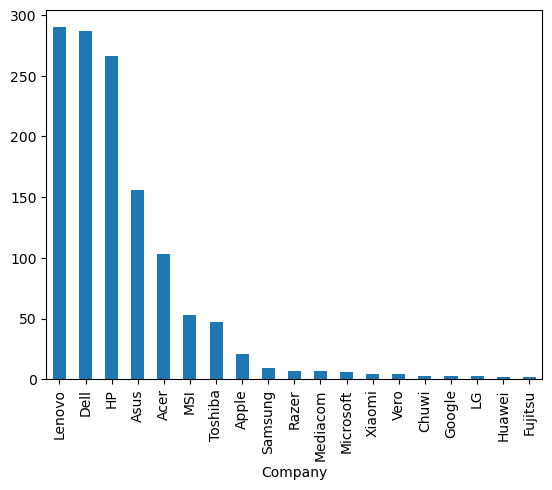

In [21]:
# Let's see the frequency of unique laptop brands in our database using a barplot
df['Company'].value_counts().plot(kind='bar')

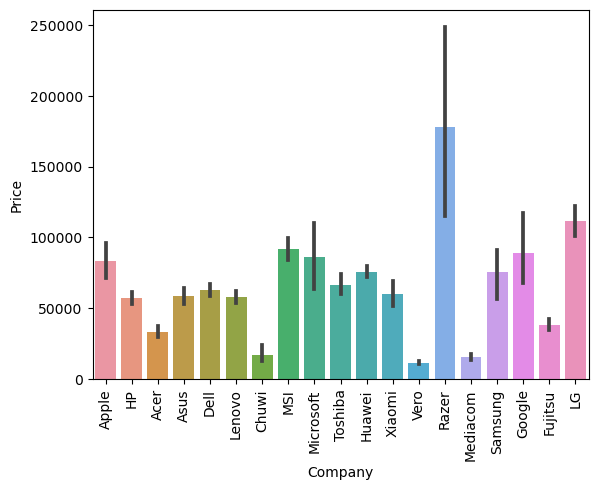

In [22]:
# Let's see the correlation of different laptop brands and price
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

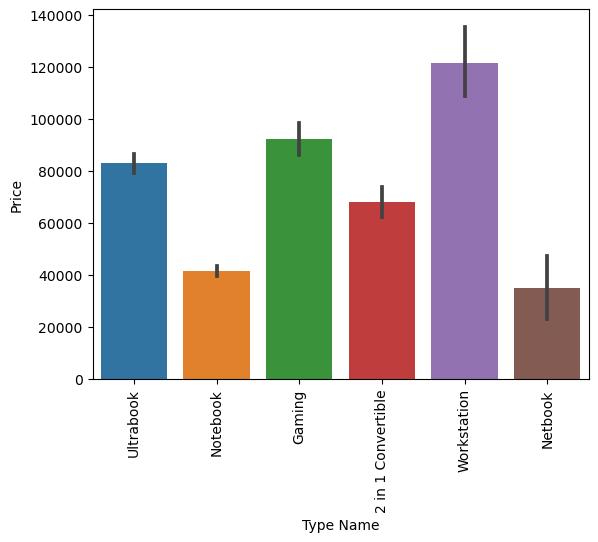

In [23]:
# Let's see the correlation of different laptop types and price
sns.barplot(x=df['Type Name'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

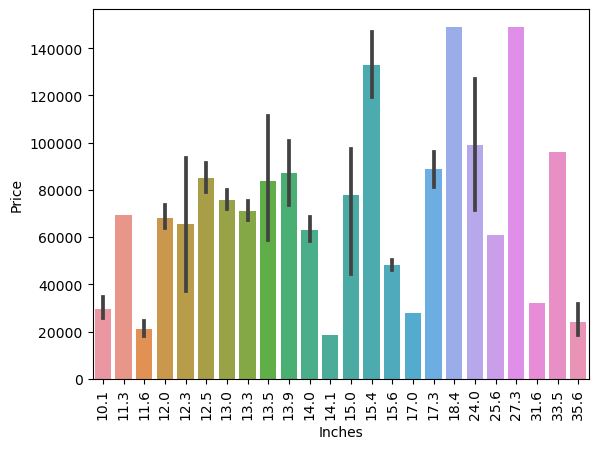

In [24]:
# Let's see the correlation of different laptop screen size(in inches) and price
sns.barplot(x=df['Inches'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [25]:
# Count of unique values in 'Screen Resolution' column
df['Screen Resolution'].value_counts()

Screen Resolution
Full HD 1920x1080                                495
1366x768                                         274
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         52
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1

In [26]:
# Let's create a new column called 'Touchscreen' indicating whether a laptop has touchscreen display or not
df['Touchscreen'] = df['Screen Resolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [27]:
df.head()

,Company,Type Name,Inches,Screen Resolution,Cpu,RAM,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


<Axes: xlabel='Touchscreen'>

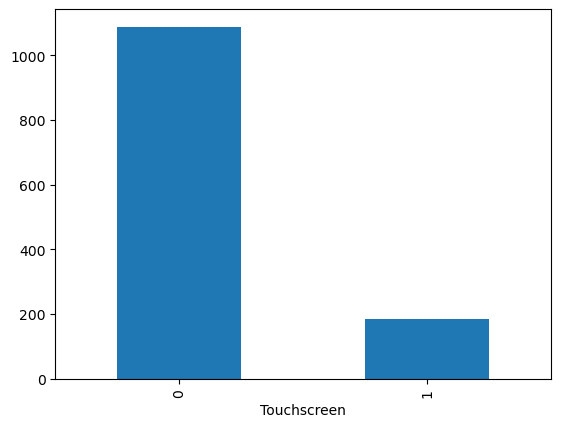

In [28]:
# Barplot of 'Touchscreen' column and their frequency
df['Touchscreen'].value_counts().plot(kind='bar')

In [29]:
# Let's create a new column called 'IPS' indicating whether a laptop has IPS Panel or not
df['IPS'] = df['Screen Resolution'].apply(lambda x:1 if 'IPS Panel' in x else 0)

In [30]:
df.head()

,Company,Type Name,Inches,Screen Resolution,Cpu,RAM,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


In [31]:
df['IPS'].value_counts()

IPS
0    914
1    359
Name: count, dtype: int64

In [32]:

# Extract x_res and y_res using regex
df[['X_res', 'Y_res']] = df['Screen Resolution'].str.extract(r'(\d+)x(\d+)')

# Convert the new columns to integer
df['X_res'] = df['X_res'].astype(int)
df['Y_res'] = df['Y_res'].astype(int)

In [33]:
df.head()

,Company,Type Name,Inches,Screen Resolution,Cpu,RAM,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1273 non-null   object 
 1   Type Name          1273 non-null   object 
 2   Inches             1273 non-null   float64
 3   Screen Resolution  1273 non-null   object 
 4   Cpu                1273 non-null   object 
 5   RAM                1273 non-null   object 
 6   Memory             1273 non-null   object 
 7   Gpu                1273 non-null   object 
 8   OpSys              1273 non-null   object 
 9   Weight             1273 non-null   float64
 10  Price              1273 non-null   float64
 11  Touchscreen        1273 non-null   int64  
 12  IPS                1273 non-null   int64  
 13  X_res              1273 non-null   int32  
 14  Y_res              1273 non-null   int32  
dtypes: float64(3), int32(2), int64(2), object(8)
memory usage: 149.2+ KB


In [35]:
# Calculate the Pixels Per Inch (PPI) of the display
 #Let's create a new column called PPI 
df['PPI'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [36]:
df.head()

,Company,Type Name,Inches,Screen Resolution,Cpu,RAM,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1273 non-null   object 
 1   Type Name          1273 non-null   object 
 2   Inches             1273 non-null   float64
 3   Screen Resolution  1273 non-null   object 
 4   Cpu                1273 non-null   object 
 5   RAM                1273 non-null   object 
 6   Memory             1273 non-null   object 
 7   Gpu                1273 non-null   object 
 8   OpSys              1273 non-null   object 
 9   Weight             1273 non-null   float64
 10  Price              1273 non-null   float64
 11  Touchscreen        1273 non-null   int64  
 12  IPS                1273 non-null   int64  
 13  X_res              1273 non-null   int32  
 14  Y_res              1273 non-null   int32  
 15  PPI                1273 non-null   float64
dtypes: float64(4), int32(2), int6

In [38]:
df_numeric=df.select_dtypes(include=[float, int])
correlation_matrix = df_numeric.corr()
correlation_matrix['Price']

Inches         0.044966
Weight         0.175896
Price          1.000000
Touchscreen    0.188994
IPS            0.254851
X_res          0.557556
Y_res          0.554069
PPI            0.468636
Name: Price, dtype: float64

In [39]:
df.head()

,Company,Type Name,Inches,Screen Resolution,Cpu,RAM,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [40]:
# Let's split the data in Cpu column into words
df['Cpu'].apply(lambda x: x.split())

0                         [Intel, Core, i5, 2.3GHz]
1                         [Intel, Core, i5, 1.8GHz]
2                  [Intel, Core, i5, 7200U, 2.5GHz]
3                         [Intel, Core, i7, 2.7GHz]
4                         [Intel, Core, i5, 3.1GHz]
                           ...                     
1298               [Intel, Core, i7, 6500U, 2.5GHz]
1299               [Intel, Core, i7, 6500U, 2.5GHz]
1300    [Intel, Celeron, Dual, Core, N3050, 1.6GHz]
1301               [Intel, Core, i7, 6500U, 2.5GHz]
1302    [Intel, Celeron, Dual, Core, N3050, 1.6GHz]
Name: Cpu, Length: 1273, dtype: object

In [41]:
# Let's create a new column CPU Name whoch stores only the first three words of the Cpu column
df['CPU Name'] = df['Cpu'].apply(lambda x: " ".join(x.split()[0:3]))

In [42]:
df.head()

,Company,Type Name,Inches,Screen Resolution,Cpu,RAM,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,PPI,CPU Name
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5


In [43]:
# This function takes a Cpu name as input ans returns the CPU Brand of it

def fetch_processor(text):
    if text == 'Intel Core i3' or text == 'Intel Core i5' or text == 'Intel Core i7':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [44]:
# Let's create CPU Brand column using the above function
df['CPU Brand'] = df['CPU Name'].apply(fetch_processor)

In [45]:
df['CPU Brand'].value_counts()

CPU Brand
Intel Core i7            515
Intel Core i5            410
Other Intel Processor    151
Intel Core i3            134
AMD Processor             63
Name: count, dtype: int64

<Axes: xlabel='CPU Brand'>

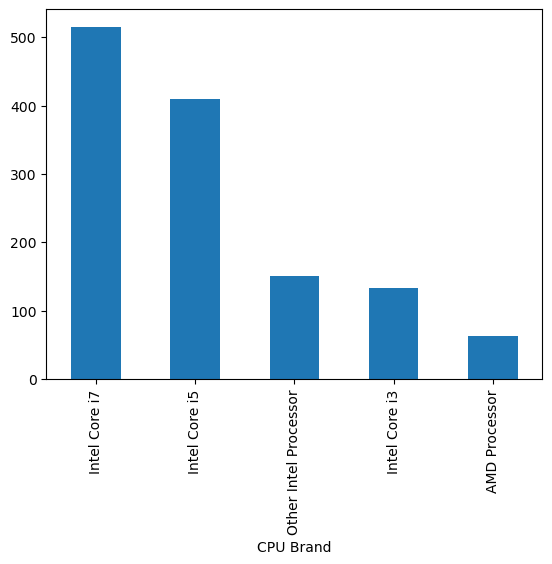

In [46]:
df['CPU Brand'].value_counts().plot(kind='bar')

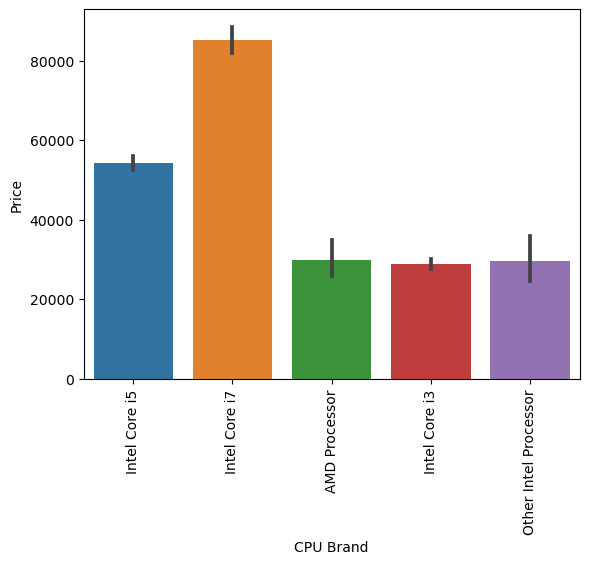

In [47]:
sns.barplot(x=df['CPU Brand'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [48]:
df.drop(['Cpu', 'CPU Name'], inplace=True, axis=1)

In [49]:
df.head()

,Company,Type Name,Inches,Screen Resolution,RAM,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,PPI,CPU Brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5


<Axes: xlabel='RAM'>

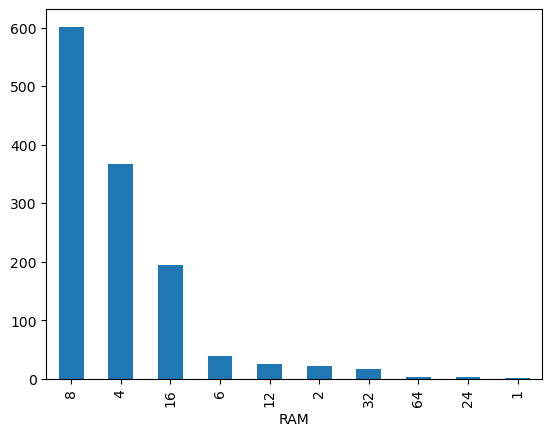

In [50]:
df['RAM'].value_counts().plot(kind='bar')

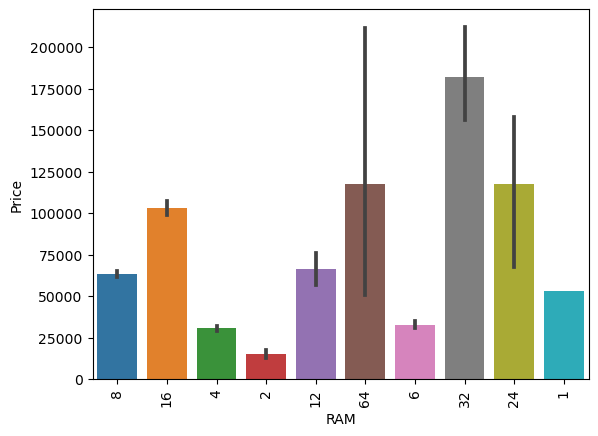

In [51]:
sns.barplot(x=df['RAM'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [52]:
df['Memory'].value_counts()

Memory
256GB SSD                        401
1TB HDD                          217
500GB HDD                        130
512GB SSD                        116
128GB SSD +  1TB HDD              92
128GB SSD                         74
256GB SSD +  1TB HDD              71
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                14
512GB SSD +  1TB HDD              14
1TB SSD                           13
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          4
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [53]:
# Replace '?' with NaN in the 'Memory' column
df['Memory'] = df['Memory'].replace('?', np.nan)

# Fill missing values in 'Memory' with 0 or any suitable placeholder
df['Memory'].fillna(0, inplace=True)


In [54]:

# Clean the 'Memory' column
df['Memory'] = df['Memory'].astype(str).replace(r'\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '').replace('TB', '000')
df["Memory"] = df["Memory"].str.strip()

# Split the 'Memory' column into 'first' and 'second'
new = df["Memory"].str.split("+", n=1, expand=True)
df["first"] = new[0].str.strip()
df["second"] = new[1].fillna("0").str.strip()

# Remove non-numeric characters and convert to integer
df['first'] = df['first'].str.extract('(\d+)').fillna('0').astype(int)
df['second'] = df['second'].str.extract('(\d+)').fillna('0').astype(int)

# Create layer columns based on presence of storage types
df["Layer1HDD"] = df["Memory"].str.contains('HDD', case=False, na=False).astype(int)
df["Layer1SSD"] = df["Memory"].str.contains('SSD', case=False, na=False).astype(int)
df["Layer1Hybrid"] = df["Memory"].str.contains('Hybrid', case=False, na=False).astype(int)
df["Layer1Flash_Storage"] = df["Memory"].str.contains('Flash Storage', case=False, na=False).astype(int)

# Calculate total values
df["HDD"] = df["first"] * df["Layer1HDD"] + df["second"] * df["Layer1HDD"]
df["SSD"] = df["first"] * df["Layer1SSD"] + df["second"] * df["Layer1SSD"]
df["Hybrid"] = df["first"] * df["Layer1Hybrid"] + df["second"] * df["Layer1Hybrid"]
df["Flash_Storage"] = df["first"] * df["Layer1Flash_Storage"] + df["second"] * df["Layer1Flash_Storage"]

# Drop intermediate columns
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage'], inplace=True)


In [55]:
df.head()

,Company,Type Name,Inches,Screen Resolution,RAM,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,PPI,CPU Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,13.3,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,15.6,Full HD 1920x1080,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5,0,256,0,0


In [56]:
# Since we no longer need the Memory column we will simply drop(or delete) it
df.drop(columns=['Memory'], inplace=True)

In [57]:

# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = df_numeric.corr()

# Extract correlation with 'Price'
price_correlation = correlation_matrix['Price']
price_correlation

Inches           0.044966
Weight           0.175896
Price            1.000000
Touchscreen      0.188994
IPS              0.254851
X_res            0.557556
Y_res            0.554069
PPI              0.468636
HDD             -0.030828
SSD              0.546349
Hybrid           0.075105
Flash_Storage   -0.038298
Name: Price, dtype: float64

In [58]:
# Since Flash_Storage and Hybrid have very weak correlation with Price(our target vairable), it is safe
#to drop these columns

df.drop(columns=['Flash_Storage', 'Hybrid'], inplace=True)

In [59]:
df.head()

,Company,Type Name,Inches,Screen Resolution,RAM,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,PPI,CPU Brand,HDD,SSD
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,13.3,1440x900,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5,0,256


In [60]:
# Let's create a new column GPU Brand which takes the first word of column Gpu and stores it
df['GPU Brand'] = df['Gpu'].apply(lambda x : x.split()[0])

In [61]:
df['GPU Brand'].value_counts()


GPU Brand
Intel     703
Nvidia    393
AMD       176
ARM         1
Name: count, dtype: int64

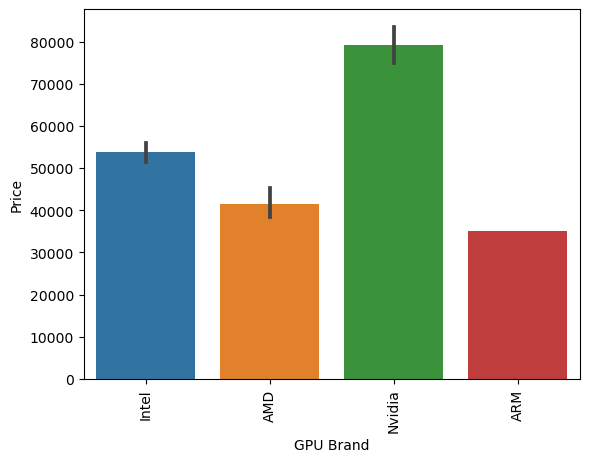

In [62]:
sns.barplot(x=df['GPU Brand'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [63]:
# Let's drop Gpu column
df.drop(columns=['Gpu'], inplace=True)

In [64]:
df.head()

,Company,Type Name,Inches,Screen Resolution,RAM,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,PPI,CPU Brand,HDD,SSD,GPU Brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,13.3,1440x900,8,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5,0,256,Intel


In [65]:
df['OpSys'].value_counts()

OpSys
Windows 10      1047
No OS             63
Linux             61
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

In [66]:
# The below function takes a oeprating system as parameter and returns whether the OS is Windows,
# Mac or Other

def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [67]:
# Let's create a new column OS using the above function
df['OS'] = df['OpSys'].apply(cat_os)

In [68]:
df.head()

,Company,Type Name,Inches,Screen Resolution,RAM,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,PPI,CPU Brand,HDD,SSD,GPU Brand,OS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,13.3,1440x900,8,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5,0,256,Intel,Mac


In [69]:
df['OS'].value_counts()

OS
Windows               1100
Others/No OS/Linux     152
Mac                     21
Name: count, dtype: int64

In [70]:
# Let's drop OpSys column
df.drop(columns=['OpSys'], inplace=True)

In [71]:
df=df.drop(columns=['Inches', 'Screen Resolution', 'X_res', 'Y_res'])

<Axes: xlabel='Weight', ylabel='Density'>

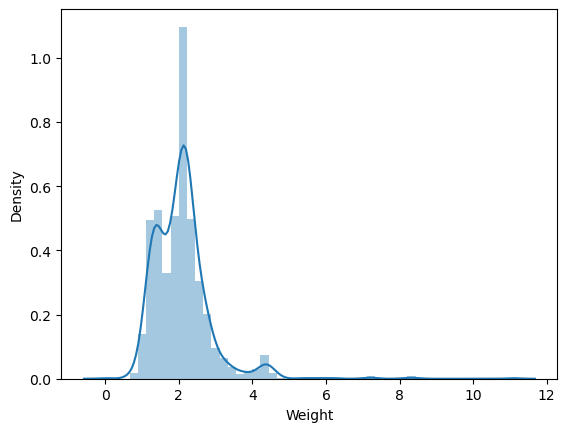

In [72]:
# Let's visualize the frequencies of different weights with a distplot
sns.distplot(df['Weight'])

In [73]:
df.head()

,Company,Type Name,RAM,Weight,Price,Touchscreen,IPS,PPI,CPU Brand,HDD,SSD,GPU Brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [74]:
# Drop non-numeric columns that can't be converted to numeric
numeric_df = df.select_dtypes(include=[float, int])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Extract the correlation with 'Price'
price_correlation = corr_matrix['Price']

# Display the result
print(price_correlation)

Weight         0.175896
Price          1.000000
Touchscreen    0.188994
IPS            0.254851
PPI            0.468636
HDD           -0.030828
SSD            0.546349
Name: Price, dtype: float64


<Axes: xlabel='Price', ylabel='Density'>

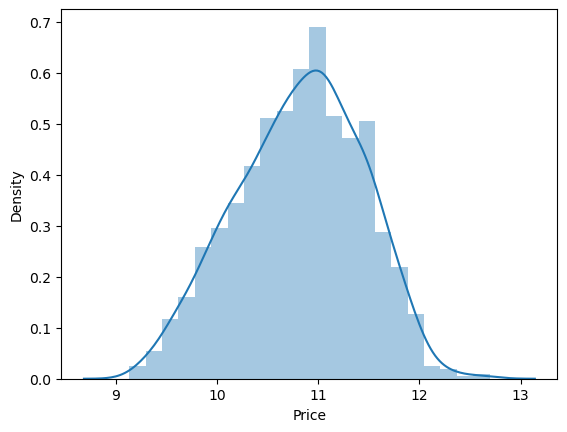

In [75]:
# While using our model we will use logarithm of our price since it is less skewed and 
# more convenient to work with
sns.distplot(np.log(df['Price']))


In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV



# Define categorical and numeric features
categorical_features = ['Company', 'Type Name', 'CPU Brand', 'GPU Brand', 'OS']
numeric_features = ['RAM', 'Weight', 'Touchscreen', 'IPS', 'PPI', 'HDD', 'SSD']

# Prepare features and target
X = df[categorical_features + numeric_features]
y = df['Price']


In [81]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create the preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
X_processed = pipeline.fit_transform(X)


In [82]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


In [84]:
# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regression': SVR()
}

# Create an empty list to store the results
results = []

# Train and evaluate the models
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate MSE and R^2 score
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append the results
    results.append([name, mse, r2])

# Create a DataFrame to display the results in tabular form
results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'R^2'])

print(results_df)

                       Model           MSE       R^2
0          Linear Regression  4.449114e+08  0.693308
1              Random Forest  2.992097e+08  0.793745
2          Gradient Boosting  3.292168e+08  0.773060
3  Support Vector Regression  1.580179e+09 -0.089269


In [ ]:
Random Forest has the best performance with the lowest MSE and highest R².
Support Vector Regression underperforms with a negative R², indicating it doesn't fit the data well.

In [88]:

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],   # Number of trees in the forest
    'max_depth': [None, 10, 20, 30]   # Maximum depth of each tree
}

# Initialize the Random Forest model
rf = RandomForestRegressor()

# Set up GridSearchCV for hyperparameter tuning with cross-validation
# cv=5: Use 5-fold cross-validation
# scoring='neg_mean_squared_error': Evaluate models using negative mean squared error
# n_jobs=-1: Use all available cores for parallel processing
grid_search = GridSearchCV(
    estimator=rf,                  # Model to be tuned
    param_grid=param_grid,         # Hyperparameters to be tested
    cv=5,                          # Number of cross-validation folds
    scoring='r2',  # Scoring metric
    n_jobs=-1                       # Use all available cores
)

# Fit the grid search to the training data
# This will perform cross-validation for each combination of hyperparameters
# and select the best-performing hyperparameters based on the scoring metric
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
# Get the best cross-validation score (negative MSE), convert it to positive MSE
best_score = -grid_search.best_score_

# Print the best parameters and the best cross-validation score
print(f"Best Parameters for Random Forest: {best_params}")
print(f"Best cross-validation r2: {best_score:.2f}")

# Get the best model with the optimal hyperparameters
best_rf_model = grid_search.best_estimator_

# Evaluate the tuned model on the test set
y_pred = best_rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance of the tuned model on the test set
print(f"Random Forest (Tuned) - MSE: {mse:.2f}, R^2: {r2:.2f}")

Best Parameters for Random Forest: {'max_depth': 20, 'n_estimators': 200}
Best cross-validation r2: -0.77
Random Forest (Tuned) - MSE: 301748525.41, R^2: 0.79


In [ ]:
Tips for Deciding Parameter Grid
Start with Default Values: Begin with default values provided by libraries to get a baseline performance.

Incremental Testing: Use a broad range initially and narrow down based on results.

Consider Model Complexity: More complex models (like Gradient Boosting) have more hyperparameters. Adjust ranges accordingly.

Use Domain Knowledge: If you have specific insights or constraints, use that information to set parameter ranges.

Compute Constraints: Be mindful of your computational resources; larger grids require more time and resources to evaluate.